<a href="https://colab.research.google.com/github/safaswedat983/Fake-News-Detection-Using-Enhanced-BERT/blob/main/fakenews_7030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive') #this line to have the ability to read from and load to drive

Mounted at /content/drive


In [ ]:
! pip install transformers

     |████████████████████████████████| 4.2 MB 4.8 MB/s 
     |████████████████████████████████| 596 kB 46.8 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 6.6 MB 44.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import EarlyStoppingCallback
from transformers import AutoModelForSequenceClassification, AutoTokenizer 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [ ]:
dataf = pd.read_csv('/content/Fake.csv')

In [ ]:
dataf.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
dataf = dataf.drop('date', axis=1)

In [ ]:
dataf = dataf.drop('subject', axis=1)

In [ ]:
dataf["label"] = 1

In [ ]:
dataf.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


In [ ]:
dataT = pd.read_csv('/content/True.csv')
dataT = dataT.drop('date', axis=1)
dataT = dataT.drop('subject', axis=1)
dataT["label"] = 0
dataT.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [ ]:
dataf.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)
dataT.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

In [ ]:
dataf.head

<bound method NDFrame.head of                                                    title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text  label  
0      Donald Trump just couldn t wish all Americans ...      1  
1      House Intelligence Committee Chairman Devin Nu...      1  
2      On Friday, it was revealed that former Milwa

In [ ]:
dataT.head

<bound method NDFrame.head of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text  label  
0      WASHINGTON (Reuters) - The head of a conservat...      0  
1      WASHINGTON (Reuters) - Transgender people will...      0  
2      WASHINGTON (Reuters) - The special counsel i

In [ ]:
#concatenate fake dataset with True dataset
frames = [dataf, dataT]

dataset = pd.concat(frames)

In [ ]:
dataset.head

<bound method NDFrame.head of                                                    title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text  label  
0      Donald Trump just couldn t wish all Americans ...      1  
1      House Intelligence Committee Chairman Devin Nu...      1  
2      On Friday, it was revealed that former Milwa

In [ ]:
from matplotlib import text
lengths = []
from tensorflow.keras.preprocessing.text import text_to_word_sequence
for ex in dataset['text']:
    tokens = text_to_word_sequence(ex,split=' ')
    lengths.append(len(tokens))

In [ ]:
print('   Min length: {:,} '.format(min(lengths)))
print('   Max length: {:,} '.format(max(lengths)))
print('Median length: {:,} '.format(int(np.median(lengths))))

   Min length: 0 
   Max length: 8,375 
Median length: 371 


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", return_dict=True, num_labels =2)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
train, test  = train_test_split(dataset, test_size=0.3 , shuffle = True , random_state= 42)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


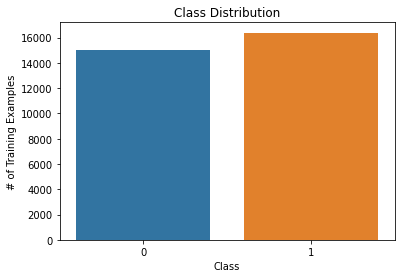

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train['label'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('# of Training Examples')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


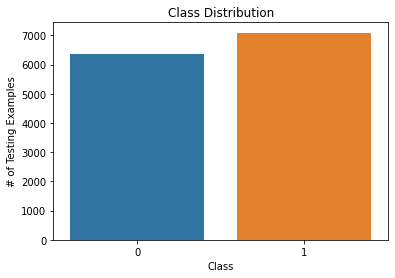

In [ ]:
sns.countplot(test['label'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('# of Testing Examples')
plt.show()

In [ ]:
#convert data into dataframe
train = pd.DataFrame(train)
test = pd.DataFrame(test)

#save data to drive to use them later
train.to_csv("drive/MyDrive/train.csv", index= False) 
test.to_csv("drive/MyDrive/test.csv", index = False)


In [ ]:
pathT = "drive/MyDrive/train.csv"
train  = pd.read_csv(pathT)

In [ ]:
pathT = "drive/MyDrive/test.csv"
test = pd.read_csv(pathT)

In [ ]:
train.shape

(31428, 3)

In [ ]:
test.shape

(13470, 3)

In [ ]:
#converting the columns into list of strings 
tr = list(train['text'])
ts = list(test['text'])

trainL = list(train['label'])
testL = list(test['label'])


In [ ]:
tokenizedTrain = tokenizer(tr, padding=True, truncation=True, max_length=512)  

In [ ]:
tokenizedTest = tokenizer(ts , padding=True , truncation=True,  max_length=512)

In [ ]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])



In [ ]:
trainDataset= Dataset(tokenizedTrain, trainL)
testDataset= Dataset(tokenizedTest, testL)

In [ ]:

#defining function to comput the metrics
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

#choosing which layers are trainable 

freeze_layer_count = 11
if freeze_layer_count:
	      # We freeze here the embeddings of the model
        for param in model.bert.embeddings.parameters():
            param.requires_grad = False

        if freeze_layer_count != -1:
	          # if freeze_layer_count == -1, we only freeze the embedding layer
	          # otherwise we freeze the first `freeze_layer_count` encoder layers
            for layer in model.bert.encoder.layer[:11]:
                for param in layer.parameters():
                    param.requires_grad = False
            for layer in model.bert.encoder.layer[11:12]:
                for param in layer.parameters():
                    param.requires_grad = True






# Define Trainer arguments 
args = TrainingArguments(
    output_dir="drive/MyDrive/DLfinal/Bert-output1", 
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=2,
    seed=0,
    load_best_model_at_end=True,
) 

#defining trainer 
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=trainDataset,
    eval_dataset=testDataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)])



# Train pre-trained model
trainer.train()


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 31428
  Num Epochs = 2
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 6286


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.060900,0.008969,0.998218,0.999435,0.997180,0.998306
1000,0.005800,0.009923,0.998293,0.999435,0.997321,0.998377
1500,0.004500,0.004456,0.999183,0.999436,0.999013,0.999224
2000,0.007800,0.006510,0.997996,0.999576,0.996615,0.998093
2500,0.003400,0.002436,0.999703,0.999577,0.999859,0.999718
3000,0.005100,0.002127,0.999629,0.999436,0.999859,0.999648
3500,0.001100,0.003003,0.999555,0.999436,0.999718,0.999577
4000,0.000900,0.003148,0.999629,0.999577,0.999718,0.999647


***** Running Evaluation *****
  Num examples = 13470
  Batch size = 10
Saving model checkpoint to drive/MyDrive/DLfinal/Bert-output1/checkpoint-500
Configuration saved in drive/MyDrive/DLfinal/Bert-output1/checkpoint-500/config.json
Model weights saved in drive/MyDrive/DLfinal/Bert-output1/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 13470
  Batch size = 10
Saving model checkpoint to drive/MyDrive/DLfinal/Bert-output1/checkpoint-1000
Configuration saved in drive/MyDrive/DLfinal/Bert-output1/checkpoint-1000/config.json
Model weights saved in drive/MyDrive/DLfinal/Bert-output1/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 13470
  Batch size = 10
Saving model checkpoint to drive/MyDrive/DLfinal/Bert-output1/checkpoint-1500
Configuration saved in drive/MyDrive/DLfinal/Bert-output1/checkpoint-1500/config.json
Model weights saved in drive/MyDrive/DLfinal/Bert-output1/checkpoint-1500/pytorch_model.bin
***** Running Evalu

TrainOutput(global_step=4000, training_loss=0.01118745418637991, metrics={'train_runtime': 12510.7488, 'train_samples_per_second': 5.024, 'train_steps_per_second': 0.502, 'total_flos': 1.052391599228928e+16, 'train_loss': 0.01118745418637991, 'epoch': 1.27})

In [ ]:
# Load trained model
model_path = "drive/MyDrive/DLfinal/Bert-output1/checkpoint-4000"
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Define test trainer
test_trainer = Trainer(model)

# Make prediction
raw_pred, _, _ = test_trainer.predict(testDataset)

loading configuration file drive/MyDrive/DLfinal/Bert-output1/checkpoint-4000/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file drive/MyDrive/DLfinal/Bert-output1/checkpoint-4000/pytorch_model.bin
All model checkpoint weights were used when initializing BertForSequ

In [ ]:
# Preprocess raw predictions
y_pred = np.argmax(raw_pred, axis=1)

In [ ]:
c= pd.DataFrame(y_pred)
c.to_csv("drive/MyDrive/DLfinal/Btask_a_en.txt", index= False, encoding='UTF-8') 

In [ ]:
accuracy = accuracy_score(y_true=test['label'], y_pred=y_pred)
recall = recall_score(y_true=test['label'], y_pred=y_pred)
precision = precision_score(y_true=test['label'], y_pred=y_pred)
f1 = f1_score(y_true=test['label'], y_pred=y_pred)
print("accuracy =",accuracy*100)
print("recall =", recall*100)
print("precision =", precision*100)
print("F1 score = ", f1*100)

accuracy = 99.98515219005196
recall = 100.0
precision = 99.97186268992684
F1 score =  99.98592936541438
